In [2]:
import string
import re
import os
import copy
import math
import pickle
from collections import Counter

In [3]:
fp = open(r'D:\M.TECH SEM 2\IR\Assignments\A3\IR-assignment-3-data.txt', "r")
text = fp.read()
#Making a list of string of each line
list_lines = text.split("\n")
# print(list_lines)
list_list_data_id4 = []
list_rows_id4 = []
list_feature75_score = []
for l in list_lines:
    #Making a list of data of each column of 1 row
    temp = l.split()
    #Storing the second column string in x
    x = temp[1]
    #Splitting the 2nd column string into 2 and storing in a list
    y = x.split(":")
    #Checking if the query id is 4 and appending the list of row to a list
    if y[1] == '4':
        list_list_data_id4.append(temp)
        list_rows_id4.append(l)
        z = temp[76]
        m = z.split(":")
        list_feature75_score.append(float(m[1]))

# print(len(list_feature75_score))
# print(list_feature75_score)
# print(len(list_list_data_id4))
# print(len(list_rows_id4))
# print(list_rows_id4)
# print("\n\n\n\n")
# print(list_list_data_id4)

In [4]:
list_relevance_score = [int(a[0]) for a in list_list_data_id4]
# print(len(list_relevance_score))
# print(list_relevance_score)

list_pairs = sorted(zip(list_rows_id4, list_relevance_score), key = lambda x: x[1], reverse= True)
#Making a list of URLs sorted on the basis of relevance score i.e order of max DCG
list_sorted_urls = [m for m,n in list_pairs]
list_sorted_scores = [n for m,n in list_pairs]
dict_scores_counts = Counter(list_sorted_scores)
count_possible_files = 1
list_permut_without_0 = []
list_permut_with_0 = []
for k in dict_scores_counts:
    if k != 0:
        count_possible_files = count_possible_files * math.factorial(dict_scores_counts[k])
    if k == 0:
        list_permut_with_0.append(dict_scores_counts[k])
    else:
        list_permut_with_0.append(dict_scores_counts[k])
        list_permut_without_0.append(dict_scores_counts[k])

# print(list_permut_without_0)
# print(list_permut_with_0)
print("The no. of files that can be created is :")
print("(",end = "")
for t in range(len(list_permut_without_0)):
    kt = list_permut_without_0[t]
    if t == (len(list_permut_without_0) - 1):
        print(f" {kt}!)",end = "")
    else:
        print(f" {kt}! ", end = "*")

print(" * (",end = "")
counts_zero_score = list_permut_with_0[(len(list_permut_with_0) -1)]
# print(counts_zero_score)
for l in range(counts_zero_score + 1):
    if l == counts_zero_score:
        print(f" 59C{l} * {l}!)")
    else:
        print(f" 59C{l} * {l}! +", end = "")
        
# for l in range(len(list_permut_with_0)):
#     kl = list_permut_with_0[l]
#     if l == (len(list_permut_with_0) - 1):
#         print(f" {kl}!)")
#     else:
#         print(f" {kl}! " ,end = "*")

    # for m in list_sorted_urls:
#     print(type(m))
#     print(m)
# print("\n\n\n\n")
# print(list_pairs)
fp2 = open(r'max_DCG_file.txt', "a")
for b in list_sorted_urls:
    fp2.write(b)
    fp2.write("\n")

fp2.close()

# print(f"\nThe no. of files that can be created = {count_possible_files}")

print("File created successfully")
count_0 = dict_scores_counts[0]
perm_sum = 0
val_cnt_0_factorial = math.factorial(count_0)
for g in range(count_0 + 1):
    perm_sum += (val_cnt_0_factorial / math.factorial(count_0 - g))
count_possible_files *= perm_sum
print(f"\n\nTotal no. of files = {count_possible_files}")

The no. of files that can be created is :
( 1! * 17! * 26!) * ( 59C0 * 0! + 59C1 * 1! + 59C2 * 2! + 59C3 * 3! + 59C4 * 4! + 59C5 * 5! + 59C6 * 6! + 59C7 * 7! + 59C8 * 8! + 59C9 * 9! + 59C10 * 10! + 59C11 * 11! + 59C12 * 12! + 59C13 * 13! + 59C14 * 14! + 59C15 * 15! + 59C16 * 16! + 59C17 * 17! + 59C18 * 18! + 59C19 * 19! + 59C20 * 20! + 59C21 * 21! + 59C22 * 22! + 59C23 * 23! + 59C24 * 24! + 59C25 * 25! + 59C26 * 26! + 59C27 * 27! + 59C28 * 28! + 59C29 * 29! + 59C30 * 30! + 59C31 * 31! + 59C32 * 32! + 59C33 * 33! + 59C34 * 34! + 59C35 * 35! + 59C36 * 36! + 59C37 * 37! + 59C38 * 38! + 59C39 * 39! + 59C40 * 40! + 59C41 * 41! + 59C42 * 42! + 59C43 * 43! + 59C44 * 44! + 59C45 * 45! + 59C46 * 46! + 59C47 * 47! + 59C48 * 48! + 59C49 * 49! + 59C50 * 50! + 59C51 * 51! + 59C52 * 52! + 59C53 * 53! + 59C54 * 54! + 59C55 * 55! + 59C56 * 56! + 59C57 * 57! + 59C58 * 58! + 59C59 * 59!)
File created successfully


Total no. of files = 5.407613242151098e+121


In [5]:
# list_relevance_score = [int(a[0]) for a in list_list_data_id4]
# # print(len(list_relevance_score))
# # print(list_relevance_score)

# list_pairs = sorted(zip(list_rows_id4, list_relevance_score), key = lambda x: x[1], reverse= True)
# #Making a list of URLs sorted on the basis of relevance score i.e order of max DCG
# list_sorted_urls = [m for m,n in list_pairs]
# list_sorted_scores = [n for m,n in list_pairs]
# dict_scores_counts = Counter(list_sorted_scores)
# count_possible_files = 1
# list_permut_without_0 = []
# list_permut_with_0 = []
# for k in dict_scores_counts:
# #     count_possible_files = count_possible_files * math.factorial(dict_scores_counts[k])
#     if k == 0:
#         list_permut_with_0.append(dict_scores_counts[k])
#     else:
#         list_permut_with_0.append(dict_scores_counts[k])
#         list_permut_without_0.append(dict_scores_counts[k])

# # print(list_permut_without_0)
# # print(list_permut_with_0)
# print("The no. of files that can be created is :")
# print("(",end = "")
# for t in range(len(list_permut_without_0)):
#     kt = list_permut_without_0[t]
#     if t == (len(list_permut_without_0) - 1):
#         print(f" {kt}!)",end = "")
#     else:
#         print(f" {kt}! ", end = "*")

# print(" +(",end = "")
# for l in range(len(list_permut_with_0)):
#     kl = list_permut_with_0[l]
#     if l == (len(list_permut_with_0) - 1):
#         print(f" {kl}!)")
#     else:
#         print(f" {kl}! " ,end = "*")

#     # for m in list_sorted_urls:
# #     print(type(m))
# #     print(m)
# # print("\n\n\n\n")
# # print(list_pairs)
# fp2 = open(r'max_DCG_file.txt', "a")
# for b in list_sorted_urls:
#     fp2.write(b)
#     fp2.write("\n")

# fp2.close()

# # print(f"\nThe no. of files that can be created = {count_possible_files}")
# print("File created successfully")


In [6]:
#Finding the nDCG value at 50 for qid:4
#First finding the IDCG value
value_idcg = 0
for i in range(50):
    num = pow(2, list_sorted_scores[i]) - 1
    val_rank = i + 1
    den = math.log2(val_rank + 1)
    value_idcg += (num / den)

# print(value_idcg)

#Now finding the DCG value
value_dcg = 0
for i in range(50):
    num = pow(2, list_relevance_score[i]) - 1
    val_rank = i + 1
    den = math.log2(val_rank + 1)
    value_dcg += (num / den)

# print(value_dcg)
value_ndcg = value_dcg / value_idcg
print(f"The nDCG value for qid:4 at 50 is = {value_ndcg}")

The nDCG value for qid:4 at 50 is = 0.35612494416255847


In [7]:
#Finding the nDCG value for whole dataset for qid:4
#First finding the IDCG value
value_idcg = 0
for i in range(len(list_sorted_scores)):
    num = pow(2, list_sorted_scores[i]) - 1
    val_rank = i + 1
    den = math.log2(val_rank + 1)
    value_idcg += (num / den)

# print(value_idcg)

#Now finding the DCG value
value_dcg = 0
for i in range(len(list_relevance_score)):
    num = pow(2, list_relevance_score[i]) - 1
    val_rank = i + 1
    den = math.log2(val_rank + 1)
    value_dcg += (num / den)

# print(value_dcg)
value_ndcg = value_dcg / value_idcg
print(f"The nDCG value for qid:4 for whole dataset is = {value_ndcg}")

The nDCG value for qid:4 for whole dataset is = 0.5784691984582591


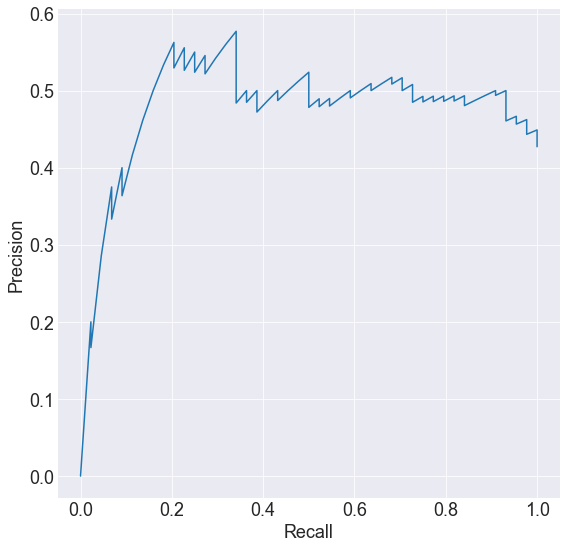

In [11]:
import matplotlib.pyplot as plt
#Ranking on the basis of feature 75 and plotting the precision-recall curve
total_relevant = 0
for a in list_relevance_score:
    if a != 0:
        total_relevant += 1
# print(total_relevant)
list_pairs = sorted(zip(list_rows_id4, list_feature75_score), key = lambda x: x[1], reverse= True)
list_sorted_urls = [m for m,n in list_pairs]
list_sorted_scores = [n for m,n in list_pairs]
# print(len(list_sorted_urls))
# print(len(list_sorted_scores))
# for x in list_sorted_scores:
#     print(x)
# print(list_sorted_urls)
list_75_sorted_judgement = []
for b in list_sorted_urls:
    list_75_sorted_judgement.append(int(b[0]))
# print(list_75_sorted_judgement)
list_precision = []
list_recall = []
relevant_retrieved = 0
for r in range(len(list_75_sorted_judgement)):
    score_judge = list_75_sorted_judgement[r]
    if score_judge == 0:
        value_precision = relevant_retrieved / (r+1)
        value_recall = relevant_retrieved / total_relevant
    else:
        relevant_retrieved += 1
        value_precision = relevant_retrieved / (r+1)
        value_recall = relevant_retrieved / total_relevant
    list_precision.append(value_precision)
    list_recall.append(value_recall)

# print(len(list_precision))
# print(len(list_recall))
# print(list_precision)
# print(list_recall)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(9,9))

plt.plot(list_recall, list_precision, )
plt.xlabel('Recall', fontsize = 18)
plt.ylabel('Precision', fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
